
# library & data load

In [60]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np

seed_num=42

wine_file = '../../../data/wine_quality/raw/winequality-red.csv'
#df = pd.read_csv(wine_file, delimiter=';') # Load the data
df = pd.read_csv(wine_file, delimiter=';')

In [62]:
X=df.drop("quality", axis=1)

In [63]:
y=df.quality

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)

In [65]:
# interpretml EBM
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
# show(marginal)

In [66]:
# Explainable boosting regressor
ebm = ExplainableBoostingRegressor(random_state=seed_num)
ebm.fit(X_train, y_train)


 #performance
from interpret.perf import RegressionPerf
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name = 'EBM')
# show(ebm_perf)

# ebm global
ebm_global = ebm.explain_global(name = 'EBM')
# show(ebm_global)

In [67]:
import utils

global_df=utils.create_global_df(X, ebm)

In [68]:
global_df

names    scores  upper_bounds  lower_bounds       col_name
0    4.600000 -0.395248     -0.164045     -0.626452  fixed acidity
1    4.800000 -0.041757      0.071245     -0.154758  fixed acidity
2    4.950000 -0.013919      0.083283     -0.111120  fixed acidity
3    5.050000  0.040293      0.093153     -0.012566  fixed acidity
4    5.150000  0.040293      0.093153     -0.012566  fixed acidity
..        ...       ...           ...           ...            ...
55  13.450000  0.429730      0.487100      0.372359        alcohol
56  13.583333  0.429730      0.487100      0.372359        alcohol
57  13.800000  0.262471      0.353117      0.171825        alcohol
58  14.450000  0.262471      0.353117      0.171825        alcohol
59  14.900000  0.262471      0.353117      0.171825        alcohol

[1178 rows x 5 columns]

In [69]:
global_df.groupby("col_name").apply(lambda x: x.scores.mean())

col_name
alcohol                 0.110327
chlorides              -0.077832
citric acid             0.049277
density                 0.025771
fixed acidity           0.008751
free sulfur dioxide     0.017986
pH                     -0.028055
residual sugar          0.009951
sulphates               0.076850
total sulfur dioxide   -0.072520
volatile acidity       -0.071545
dtype: float64

In [70]:
score_df=utils.get_score_variance_table(global_df, ebm)

In [71]:
score_df

min       max  max_min_gap  \
col_name                                                
alcohol              -0.654761  0.491842     1.146603   
chlorides            -0.706247  0.184586     0.890833   
citric acid          -0.053926  0.466329     0.520256   
density              -0.145886  0.343024     0.488909   
fixed acidity        -0.395248  0.082383     0.477632   
free sulfur dioxide  -0.051096  0.128226     0.179322   
pH                   -0.563638  0.050349     0.613987   
residual sugar       -0.181772  0.204395     0.386168   
sulphates            -0.311588  0.228427     0.540015   
total sulfur dioxide -0.321610  0.130978     0.452588   
volatile acidity     -0.612309  0.237750     0.850059   

                      max_min_gap_excld_extrm  feature_importance       std  
col_name                                                                     
alcohol                              0.670013            0.150069  0.292798  
chlorides                            0.399187            0.044027  0.148635  
citric acid                          0.402368            0.035143  0.118874  
density                              0.276713            0.074179  0.100683  
fixed acidity                        0.227551            0.029544  0.079464  
free sulfur dioxide                  0.136209            0.019776  0.040147  
pH                                   0.178431            0.033212  0.113785  
residual sugar                       0.295677            0.019034  0.069459  
sulphates                            0.531759            0.168490  0.196751  
total sulfur dioxide                 0.376800            0.063643  0.126596  
volatile acidity                     0.765244            0.093286  0.203817

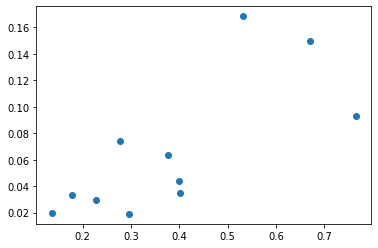

In [13]:
plt.scatter(x=score_df.max_min_gap_excld_extrm, y=score_df.feature_importance)

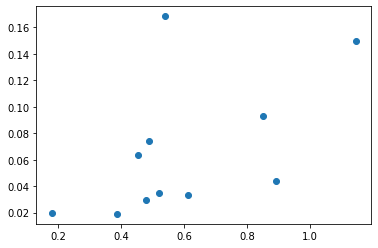

In [14]:
plt.scatter(x=score_df.max_min_gap, y=score_df.feature_importance)

In [72]:
score_df.sort_values("max_min_gap",ascending=False).head(20)

min       max  max_min_gap  \
col_name                                                
alcohol              -0.654761  0.491842     1.146603   
chlorides            -0.706247  0.184586     0.890833   
volatile acidity     -0.612309  0.237750     0.850059   
pH                   -0.563638  0.050349     0.613987   
sulphates            -0.311588  0.228427     0.540015   
citric acid          -0.053926  0.466329     0.520256   
density              -0.145886  0.343024     0.488909   
fixed acidity        -0.395248  0.082383     0.477632   
total sulfur dioxide -0.321610  0.130978     0.452588   
residual sugar       -0.181772  0.204395     0.386168   
free sulfur dioxide  -0.051096  0.128226     0.179322   

                      max_min_gap_excld_extrm  feature_importance       std  
col_name                                                                     
alcohol                              0.670013            0.150069  0.292798  
chlorides                            0.399187            0.044027  0.148635  
volatile acidity                     0.765244            0.093286  0.203817  
pH                                   0.178431            0.033212  0.113785  
sulphates                            0.531759            0.168490  0.196751  
citric acid                          0.402368            0.035143  0.118874  
density                              0.276713            0.074179  0.100683  
fixed acidity                        0.227551            0.029544  0.079464  
total sulfur dioxide                 0.376800            0.063643  0.126596  
residual sugar                       0.295677            0.019034  0.069459  
free sulfur dioxide                  0.136209            0.019776  0.040147

In [73]:
score_df.sort_values("feature_importance",ascending=False).head(20)

min       max  max_min_gap  \
col_name                                                
sulphates            -0.311588  0.228427     0.540015   
alcohol              -0.654761  0.491842     1.146603   
volatile acidity     -0.612309  0.237750     0.850059   
density              -0.145886  0.343024     0.488909   
total sulfur dioxide -0.321610  0.130978     0.452588   
chlorides            -0.706247  0.184586     0.890833   
citric acid          -0.053926  0.466329     0.520256   
pH                   -0.563638  0.050349     0.613987   
fixed acidity        -0.395248  0.082383     0.477632   
free sulfur dioxide  -0.051096  0.128226     0.179322   
residual sugar       -0.181772  0.204395     0.386168   

                      max_min_gap_excld_extrm  feature_importance       std  
col_name                                                                     
sulphates                            0.531759            0.168490  0.196751  
alcohol                              0.670013            0.150069  0.292798  
volatile acidity                     0.765244            0.093286  0.203817  
density                              0.276713            0.074179  0.100683  
total sulfur dioxide                 0.376800            0.063643  0.126596  
chlorides                            0.399187            0.044027  0.148635  
citric acid                          0.402368            0.035143  0.118874  
pH                                   0.178431            0.033212  0.113785  
fixed acidity                        0.227551            0.029544  0.079464  
free sulfur dioxide                  0.136209            0.019776  0.040147  
residual sugar                       0.295677            0.019034  0.069459

In [74]:
appended_df=utils.append_prediction(X, ebm)

In [75]:
appended_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  prediction  
0         9.4    5.026247  
1         9.8    5.297636  
2         9.8    5.524315  
3         9.8    5.699426  
4         9.4    5.026247  
...       ...         ...  
1594     10.5    5.554284  
1595     11.2    5.950075  
1596     11.0    5.870364  
1597     10.2    5.828951  
1598     11.0    5.962520  

[1599 rows x 12 columns]

In [76]:
fi_df=utils.get_feature_importance_df(X, ebm)

In [77]:
fi_df

feature  importance
0                      fixed acidity    0.029544
1                   volatile acidity    0.093286
2                        citric acid    0.035143
3                     residual sugar    0.019034
4                          chlorides    0.044027
5                free sulfur dioxide    0.019776
6               total sulfur dioxide    0.063643
7                            density    0.074179
8                                 pH    0.033212
9                          sulphates    0.168490
10                           alcohol    0.150069
11  total sulfur dioxide x sulphates    0.033093